<a href="https://colab.research.google.com/github/sandeepyadav10011995/Machine-Learning-Templates/blob/master/MLE_LM_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

print("pandas version - ", pd.__version__)
print("numpy version - ", pd.__version__)

pandas version -  1.1.5
numpy version -  1.1.5


In [ ]:
## do not change this
np.random.seed(101)

# Load The Data

### Read Data from CSV

In [ ]:
## your code here
df = pd.read_csv("Test Data.csv")
df.head()

,Business_Mon_WkBegin,Geography,Shop_Code,Prefecture,TV_Area_code,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems
0,28-03-2016,National,110011,28,17,4084,2054260,503.0,18.066667,1.333333,102.808975,101.733333,0.0,0.0,0,0,0,0,0,0.0,0.0,0.000,0,0,0,0,1386,459451,18593,451,0,0
1,4/4/2016,National,110011,28,17,3555,1946250,547.5,16.585714,2.642857,102.808975,101.733333,0.0,0.0,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,6355733,2787,557626,17791,283,0,0
2,11/4/2016,National,110011,28,17,3434,1929610,561.9,18.585714,2.500000,102.808975,101.733333,0.0,0.0,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,50000,3709,506013,18793,643,0,0
3,18-04-2016,National,110011,28,17,3384,1883552,556.6,18.371429,3.571429,102.808975,101.733333,0.0,0.0,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,50000,4111,484135,17110,725,0,0
4,25-04-2016,National,110011,28,17,3972,2101362,529.0,19.542857,1.000000,102.808975,101.733333,0.0,0.0,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,0,4333,633921,21999,676,0,0


### Summarise the data
 1. Stats about all the columns
 2. DataTypes of various columns
 3. Number of Data Points, Features.

### *1. Stats about all the columns*

In [ ]:
df.describe()

,Shop_Code,Prefecture,TV_Area_code,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems
count,410.000000,410.0,410.0,410.000000,4.100000e+02,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,4.100000e+02,4.100000e+02,4.100000e+02,4.100000e+02,4.100000e+02,410.000000,4.100000e+02,410.000000,410.000000,410.000000,410.000000
mean,110019.500000,28.0,17.0,3316.392683,1.773312e+06,530.095366,19.618217,2.284506,105.037524,118.946262,66792.294845,9755.504827,2068.897561,719.512195,78.780488,2724.390244,56.829268,328.786829,328.786829,4.071004e+05,7.595366e+05,4.926696e+05,5.772737e+07,5.897958e+07,35132.843902,1.286018e+06,72002.117073,460.763415,15803.636585,11796.239024
std,8.510385,0.0,0.0,584.944609,4.186248e+05,48.577134,7.684544,3.551912,1.598141,13.415880,75283.146816,4733.144921,3154.328079,4300.094928,533.854806,6333.316280,199.791322,219.142627,219.142627,2.744129e+05,1.868751e+06,1.493622e+06,1.410942e+08,1.410258e+08,94461.379590,4.151076e+05,26549.366381,251.610665,50304.076450,39745.240046
min,110011.000000,28.0,17.0,2075.000000,9.760400e+05,405.600000,4.100000,0.000000,101.157381,91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1386.000000,4.182180e+05,17110.000000,0.000000,0.000000,0.000000
25%,110011.000000,28.0,17.0,2816.250000,1.378423e+06,493.950000,12.200000,0.300000,104.086118,110.600000,19113.956970,6149.621602,1222.000000,0.000000,0.000000,0.000000,0.000000,166.700000,166.700000,2.034137e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+05,4999.000000,1.013149e+06,53495.000000,266.250000,0.000000,0.000000
50%,110019.500000,28.0,17.0,3356.500000,1.825165e+06,522.150000,19.900000,1.200000,104.638092,118.766667,57262.416060,9759.896120,1534.000000,0.000000,0.000000,0.000000,0.000000,331.200000,331.200000,4.059732e+05,1.000000e+05,0.000000e+00,5.600000e+04,3.477697e+06,8052.000000,1.216229e+06,69282.000000,417.000000,0.000000,0.000000
75%,110028.000000,28.0,17.0,3719.500000,2.103831e+06,571.050000,26.257143,3.000000,105.524297,124.600000,83572.520700,11764.450840,1945.000000,0.000000,0.000000,0.000000,0.000000,469.600000,469.600000,5.835178e+05,4.000000e+05,7.769700e+04,3.408533e+07,3.628200e+07,15039.000000,1.482700e+06,86673.000000,642.250000,235.000000,0.000000
max,110028.000000,28.0,17.0,5433.000000,3.162632e+06,763.200000,33.600000,29.900000,111.765995,161.677419,653893.114100,23691.027020,41121.000000,30000.000000,6000.000000,25000.000000,1000.000000,1052.500000,1052.500000,1.284300e+06,1.333000e+07,1.129049e+07,9.777600e+08,9.807000e+08,552314.000000,3.075072e+06,169580.000000,1131.000000,325221.000000,378801.000000


### *2. DataTypes of various columns*

In [ ]:
df.dtypes

Business_Mon_WkBegin                object
Geography                           object
Shop_Code                            int64
Prefecture                           int64
TV_Area_code                         int64
NoOfCustomerVisits                   int64
SalesMeter3MoneyTaxIncluded          int64
Price_PerCustomer                  float64
Temperature                        float64
Precipitation                      float64
RPC_INDEX                          float64
Japanese_Noodle_Expen              float64
AppCoup01_Regular                  float64
App_Daily_Users                    float64
App_Downloads                        int64
Postal_02                            int64
Handout_03                           int64
Instore_04                           int64
InstoreFlier_05                      int64
TV_ST                              float64
TV_LT                              float64
TV_GA                              float64
PR_Web                               int64
PR_Print   

In [ ]:
df.apply(lambda x: len(x.unique()))

Business_Mon_WkBegin               205
Geography                            1
Shop_Code                            2
Prefecture                           1
TV_Area_code                         1
NoOfCustomerVisits                 363
SalesMeter3MoneyTaxIncluded        410
Price_PerCustomer                  369
Temperature                        278
Precipitation                      119
RPC_INDEX                           46
Japanese_Noodle_Expen               46
AppCoup01_Regular                  145
App_Daily_Users                    197
App_Downloads                      186
Postal_02                            4
Handout_03                          12
Instore_04                          17
InstoreFlier_05                      5
TV_ST                              180
TV_LT                              180
TV_GA                              181
PR_Web                              45
PR_Print                            61
PR_TV                              101
Total_PR                 

##### From the above we can conclude that "Geography","Prefecture" and "TV_Area_code"  are same in all the rows/records. 

In [ ]:
categorical = df.dtypes[df.dtypes=="object"].index
print(categorical)

Index(['Business_Mon_WkBegin', 'Geography'], dtype='object')


In [ ]:
df[categorical].apply(lambda x: len(x.unique()))

Business_Mon_WkBegin    205
Geography                 1
dtype: int64

#### So they("Geography","Prefecture" and "TV_Area_code") will not play any role in the model building. Therefore we can drop these columns from the dataframe.

In [ ]:
df.drop(["Geography","Prefecture","TV_Area_code"], axis=1, inplace=True)

### *3. Number of Data Points, Features*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Business_Mon_WkBegin             410 non-null    object 
 1   Shop_Code                        410 non-null    int64  
 2   NoOfCustomerVisits               410 non-null    int64  
 3   SalesMeter3MoneyTaxIncluded      410 non-null    int64  
 4   Price_PerCustomer                410 non-null    float64
 5   Temperature                      410 non-null    float64
 6   Precipitation                    410 non-null    float64
 7   RPC_INDEX                        410 non-null    float64
 8   Japanese_Noodle_Expen            410 non-null    float64
 9   AppCoup01_Regular                410 non-null    float64
 10  App_Daily_Users                  410 non-null    float64
 11  App_Downloads                    410 non-null    int64  
 12  Postal_02             

##### **Number Of Data Points = 410**
##### **Number Of Features = 29** 

### Missing Data Processing
 1. Check for Missing Data
 2. Remove rows with Missing dates.
 3. Fill zeros for other numerical missing data.

### *1. Check for Missing Data*

In [ ]:
df.apply(lambda x: sum(x.isnull()))

Business_Mon_WkBegin               0
Shop_Code                          0
NoOfCustomerVisits                 0
SalesMeter3MoneyTaxIncluded        0
Price_PerCustomer                  0
Temperature                        0
Precipitation                      0
RPC_INDEX                          0
Japanese_Noodle_Expen              0
AppCoup01_Regular                  0
App_Daily_Users                    0
App_Downloads                      0
Postal_02                          0
Handout_03                         0
Instore_04                         0
InstoreFlier_05                    0
TV_ST                              0
TV_LT                              0
TV_GA                              0
PR_Web                             0
PR_Print                           0
PR_TV                              0
Total_PR                           0
Tweets                             0
Page_Views                         0
Unique_Users                       0
Total_MealCount                    0
C

### *2. Remove rows with Missing dates --> No row has missing date, therefore no need of removing rows.*

### *3. Fill zeros for other numerical missing data --> No quatitave variable has missing data, therefore no need to fill zeros.*

### Convert Date columns to Python DateTime 
 * Convert
 * Extract new column with Month of the Dates

### *Convert*

In [ ]:
df.head(10)

,Business_Mon_WkBegin,Shop_Code,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems
0,28-03-2016,110011,4084,2054260,503.0,18.066667,1.333333,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,0,0,0,0,1386,459451,18593,451,0,0
1,4/4/2016,110011,3555,1946250,547.5,16.585714,2.642857,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,6355733,2787,557626,17791,283,0,0
2,11/4/2016,110011,3434,1929610,561.9,18.585714,2.500000,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,50000,3709,506013,18793,643,0,0
3,18-04-2016,110011,3384,1883552,556.6,18.371429,3.571429,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,50000,4111,484135,17110,725,0,0
4,25-04-2016,110011,3972,2101362,529.0,19.542857,1.000000,102.808975,101.733333,0.00000,0.000000,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,0,4333,633921,21999,676,0,0
5,2/5/2016,110011,4408,2454310,556.8,20.914286,0.428571,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,0,0,22303333,22303333,3964,583431,21198,761,0,0
6,9/5/2016,110011,3254,1791317,550.5,20.900000,3.857143,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,50000,0,1210667,1260667,3175,418218,17110,525,0,0
7,16-05-2016,110011,3432,1902657,554.4,23.014286,3.000000,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,212.7,212.7,259544.628,0,0,32910667,32910667,4334,548089,21719,599,0,0
8,23-05-2016,110011,3477,1914337,550.6,23.428571,1.785714,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,101.0,101.0,123244.044,0,0,636000000,636000000,3360,587639,23121,600,0,0
9,30-05-2016,110011,4016,2107220,524.7,23.185714,0.142857,103.413376,123.064516,45394.23871,185.005236,7681,0,0,16000,0,337.1,337.1,411342.234,400000,1141816,0,1541816,3127,1067006,49808,516,0,0


In [ ]:
import datetime as dt
def format_map(x):
    if "/" in x:
        return "%d/%m/%Y"
    return "%d-%m-%Y"
format_mapping = [format_map(date) for date in df['Business_Mon_WkBegin']]
for idx, format in enumerate(format_mapping):
    df['Business_Mon_WkBegin'][idx] = dt.datetime.strptime(df['Business_Mon_WkBegin'][idx], format).strftime("%d-%m-%Y")

df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Business_Mon_WkBegin,Shop_Code,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems
0,28-03-2016,110011,4084,2054260,503.0,18.066667,1.333333,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,0,0,0,0,1386,459451,18593,451,0,0
1,04-04-2016,110011,3555,1946250,547.5,16.585714,2.642857,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,6355733,2787,557626,17791,283,0,0
2,11-04-2016,110011,3434,1929610,561.9,18.585714,2.500000,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,50000,3709,506013,18793,643,0,0
3,18-04-2016,110011,3384,1883552,556.6,18.371429,3.571429,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,50000,4111,484135,17110,725,0,0
4,25-04-2016,110011,3972,2101362,529.0,19.542857,1.000000,102.808975,101.733333,0.00000,0.000000,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,0,4333,633921,21999,676,0,0
5,02-05-2016,110011,4408,2454310,556.8,20.914286,0.428571,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,0,0,22303333,22303333,3964,583431,21198,761,0,0
6,09-05-2016,110011,3254,1791317,550.5,20.900000,3.857143,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,50000,0,1210667,1260667,3175,418218,17110,525,0,0
7,16-05-2016,110011,3432,1902657,554.4,23.014286,3.000000,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,212.7,212.7,259544.628,0,0,32910667,32910667,4334,548089,21719,599,0,0
8,23-05-2016,110011,3477,1914337,550.6,23.428571,1.785714,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,101.0,101.0,123244.044,0,0,636000000,636000000,3360,587639,23121,600,0,0
9,30-05-2016,110011,4016,2107220,524.7,23.185714,0.142857,103.413376,123.064516,45394.23871,185.005236,7681,0,0,16000,0,337.1,337.1,411342.234,400000,1141816,0,1541816,3127,1067006,49808,516,0,0


In [ ]:
df.Business_Mon_WkBegin

0      28-03-2016
1      04-04-2016
2      11-04-2016
3      18-04-2016
4      25-04-2016
          ...    
405    27-01-2020
406    03-02-2020
407    10-02-2020
408    17-02-2020
409    24-02-2020
Name: Business_Mon_WkBegin, Length: 410, dtype: object

In [ ]:
df['Business_Mon_WkBegin'][:10]

0    28-03-2016
1    04-04-2016
2    11-04-2016
3    18-04-2016
4    25-04-2016
5    02-05-2016
6    09-05-2016
7    16-05-2016
8    23-05-2016
9    30-05-2016
Name: Business_Mon_WkBegin, dtype: object

In [ ]:
df['Business_Mon_WkBegin'] = pd.to_datetime(df['Business_Mon_WkBegin'], format="%d-%m-%Y")
df.head(10)

,Business_Mon_WkBegin,Shop_Code,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems
0,2016-03-28,110011,4084,2054260,503.0,18.066667,1.333333,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,0,0,0,0,1386,459451,18593,451,0,0
1,2016-04-04,110011,3555,1946250,547.5,16.585714,2.642857,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,6355733,2787,557626,17791,283,0,0
2,2016-04-11,110011,3434,1929610,561.9,18.585714,2.500000,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,50000,3709,506013,18793,643,0,0
3,2016-04-18,110011,3384,1883552,556.6,18.371429,3.571429,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,50000,4111,484135,17110,725,0,0
4,2016-04-25,110011,3972,2101362,529.0,19.542857,1.000000,102.808975,101.733333,0.00000,0.000000,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,0,4333,633921,21999,676,0,0
5,2016-05-02,110011,4408,2454310,556.8,20.914286,0.428571,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,0,0,22303333,22303333,3964,583431,21198,761,0,0
6,2016-05-09,110011,3254,1791317,550.5,20.900000,3.857143,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,50000,0,1210667,1260667,3175,418218,17110,525,0,0
7,2016-05-16,110011,3432,1902657,554.4,23.014286,3.000000,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,212.7,212.7,259544.628,0,0,32910667,32910667,4334,548089,21719,599,0,0
8,2016-05-23,110011,3477,1914337,550.6,23.428571,1.785714,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,101.0,101.0,123244.044,0,0,636000000,636000000,3360,587639,23121,600,0,0
9,2016-05-30,110011,4016,2107220,524.7,23.185714,0.142857,103.413376,123.064516,45394.23871,185.005236,7681,0,0,16000,0,337.1,337.1,411342.234,400000,1141816,0,1541816,3127,1067006,49808,516,0,0


In [ ]:
df.Business_Mon_WkBegin

0     2016-03-28
1     2016-04-04
2     2016-04-11
3     2016-04-18
4     2016-04-25
         ...    
405   2020-01-27
406   2020-02-03
407   2020-02-10
408   2020-02-17
409   2020-02-24
Name: Business_Mon_WkBegin, Length: 410, dtype: datetime64[ns]

### *Extract new column with Month of the Dates*

In [ ]:
# data['Month_No'] = data.Business_Mon_WkBegin.dt.month
df['Month_No'] = df.Business_Mon_WkBegin.dt.month

In [ ]:
# # data['Month_Name'] = data.Business_Mon_WkBegin.dt.strftime("%B")
# df['Month_Name'] = df.Business_Mon_WkBegin.dt.strftime("%B")

In [ ]:
df.head(10)

,Business_Mon_WkBegin,Shop_Code,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems,Month_No
0,2016-03-28,110011,4084,2054260,503.0,18.066667,1.333333,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,0,0,0,0,1386,459451,18593,451,0,0,3
1,2016-04-04,110011,3555,1946250,547.5,16.585714,2.642857,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,6355733,2787,557626,17791,283,0,0,4
2,2016-04-11,110011,3434,1929610,561.9,18.585714,2.500000,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,50000,3709,506013,18793,643,0,0,4
3,2016-04-18,110011,3384,1883552,556.6,18.371429,3.571429,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,50000,4111,484135,17110,725,0,0,4
4,2016-04-25,110011,3972,2101362,529.0,19.542857,1.000000,102.808975,101.733333,0.00000,0.000000,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,0,4333,633921,21999,676,0,0,4
5,2016-05-02,110011,4408,2454310,556.8,20.914286,0.428571,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,0,0,22303333,22303333,3964,583431,21198,761,0,0,5
6,2016-05-09,110011,3254,1791317,550.5,20.900000,3.857143,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,50000,0,1210667,1260667,3175,418218,17110,525,0,0,5
7,2016-05-16,110011,3432,1902657,554.4,23.014286,3.000000,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,212.7,212.7,259544.628,0,0,32910667,32910667,4334,548089,21719,599,0,0,5
8,2016-05-23,110011,3477,1914337,550.6,23.428571,1.785714,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,101.0,101.0,123244.044,0,0,636000000,636000000,3360,587639,23121,600,0,0,5
9,2016-05-30,110011,4016,2107220,524.7,23.185714,0.142857,103.413376,123.064516,45394.23871,185.005236,7681,0,0,16000,0,337.1,337.1,411342.234,400000,1141816,0,1541816,3127,1067006,49808,516,0,0,5


### Convert Categorical Variables to Numeric Type which Model can Handle

#### By analysing the data, we infer that the data is provided for two SHOP's for the same time frame. So Shop Code is a categorical variable just like ZipCode or Pin Code.

In [ ]:
# Geography, Prefecture, TV_Area_code contains only single value --> Will not play any role in valuation.
# Shop Code is only the Categorical Variable, although it has numerical values just like ZipCode or Pin Code.
cleanup_nums = {"Shop_Code": {110011: "110011", 110028: "110028"}}
df2 = df.copy()
df2.replace(cleanup_nums, inplace=True)
df2.Shop_Code

0      110011
1      110011
2      110011
3      110011
4      110011
        ...  
405    110028
406    110028
407    110028
408    110028
409    110028
Name: Shop_Code, Length: 410, dtype: object

In [ ]:
# Converting the dtype of ShopCode to "category"
df2["Shop_Code"] = df2["Shop_Code"].astype('category')
df2.Shop_Code

0      110011
1      110011
2      110011
3      110011
4      110011
        ...  
405    110028
406    110028
407    110028
408    110028
409    110028
Name: Shop_Code, Length: 410, dtype: category
Categories (2, object): ['110011', '110028']

In [ ]:
# Splitting the data for both the ShopCode : "df2_110011" and "df2_110028"
df2_110011 = df2[df2['Shop_Code'] == '110011'].drop('Shop_Code', axis=1)
df2_110028 = df2[df2['Shop_Code'] == '110028'].drop('Shop_Code', axis=1)

In [ ]:
df2_110011.head(10)

,Business_Mon_WkBegin,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems,Month_No
0,2016-03-28,4084,2054260,503.0,18.066667,1.333333,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,0,0,0,0,1386,459451,18593,451,0,0,3
1,2016-04-04,3555,1946250,547.5,16.585714,2.642857,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,6355733,2787,557626,17791,283,0,0,4
2,2016-04-11,3434,1929610,561.9,18.585714,2.500000,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,50000,3709,506013,18793,643,0,0,4
3,2016-04-18,3384,1883552,556.6,18.371429,3.571429,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,50000,4111,484135,17110,725,0,0,4
4,2016-04-25,3972,2101362,529.0,19.542857,1.000000,102.808975,101.733333,0.00000,0.000000,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,0,4333,633921,21999,676,0,0,4
5,2016-05-02,4408,2454310,556.8,20.914286,0.428571,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,0,0,22303333,22303333,3964,583431,21198,761,0,0,5
6,2016-05-09,3254,1791317,550.5,20.900000,3.857143,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,50000,0,1210667,1260667,3175,418218,17110,525,0,0,5
7,2016-05-16,3432,1902657,554.4,23.014286,3.000000,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,212.7,212.7,259544.628,0,0,32910667,32910667,4334,548089,21719,599,0,0,5
8,2016-05-23,3477,1914337,550.6,23.428571,1.785714,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,101.0,101.0,123244.044,0,0,636000000,636000000,3360,587639,23121,600,0,0,5
9,2016-05-30,4016,2107220,524.7,23.185714,0.142857,103.413376,123.064516,45394.23871,185.005236,7681,0,0,16000,0,337.1,337.1,411342.234,400000,1141816,0,1541816,3127,1067006,49808,516,0,0,5


In [ ]:
df2_110028.head(10)

,Business_Mon_WkBegin,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems,Month_No
205,2016-03-28,3568,1655673,464.0,18.233333,1.000000,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,0,0,0,0,1386,459451,18593,102,0,0,3
206,2016-04-04,2946,1481051,502.7,17.500000,3.357143,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,6355733,2787,557626,17791,28,0,0,4
207,2016-04-11,3091,1534455,496.4,18.828571,0.285714,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,50000,3709,506013,18793,280,0,0,4
208,2016-04-18,2980,1474976,495.0,18.271429,2.285714,102.808975,101.733333,0.00000,0.000000,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,50000,4111,484135,17110,344,0,0,4
209,2016-04-25,3589,1679880,468.1,19.428571,0.857143,102.808975,101.733333,0.00000,0.000000,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,0,4333,633921,21999,363,0,0,4
210,2016-05-02,3951,1970607,498.8,20.957143,0.785714,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,0,0,22303333,22303333,3964,583431,21198,426,0,0,5
211,2016-05-09,2826,1398052,494.7,21.157143,4.571429,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,0.0,0.0,0.000,50000,0,1210667,1260667,3175,418218,17110,305,0,0,5
212,2016-05-16,3043,1505707,494.8,23.642857,6.500000,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,212.7,212.7,259544.628,0,0,32910667,32910667,4334,548089,21719,352,0,0,5
213,2016-05-23,3113,1566896,503.3,24.171429,3.357143,103.413376,123.064516,0.00000,0.000000,0,0,0,0,0,101.0,101.0,123244.044,0,0,636000000,636000000,3360,587639,23121,440,0,0,5
214,2016-05-30,3359,1577958,469.8,23.150000,0.083333,103.413376,123.064516,45394.23871,185.005236,7681,0,0,16000,0,337.1,337.1,411342.234,400000,1141816,0,1541816,3127,1067006,49808,359,0,0,5


# Data Transformation

### Lag transformation
 * Convert 'NoOfCustomerVisits' column to lag difference of 2 weeks.

In [ ]:
# data['NoOfCustomerVisits_Lag_2'] = abs(data.NoOfCustomerVisits.diff(2))
df2_110011['NoOfCustomerVisits_Lag_2'] = abs(df2_110011.NoOfCustomerVisits.diff(2))
df2_110011.head()

,Business_Mon_WkBegin,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems,Month_No,NoOfCustomerVisits_Lag_2
0,2016-03-28,4084,2054260,503.0,18.066667,1.333333,102.808975,101.733333,0.0,0.0,0,0,0,0,0,0.0,0.0,0.000,0,0,0,0,1386,459451,18593,451,0,0,3,NaN
1,2016-04-04,3555,1946250,547.5,16.585714,2.642857,102.808975,101.733333,0.0,0.0,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,6355733,2787,557626,17791,283,0,0,4,NaN
2,2016-04-11,3434,1929610,561.9,18.585714,2.500000,102.808975,101.733333,0.0,0.0,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,50000,3709,506013,18793,643,0,0,4,650.0
3,2016-04-18,3384,1883552,556.6,18.371429,3.571429,102.808975,101.733333,0.0,0.0,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,50000,4111,484135,17110,725,0,0,4,171.0
4,2016-04-25,3972,2101362,529.0,19.542857,1.000000,102.808975,101.733333,0.0,0.0,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,0,4333,633921,21999,676,0,0,4,538.0


In [ ]:
df2_110028['NoOfCustomerVisits_Lag_2'] = abs(df2_110028.NoOfCustomerVisits.diff(2))
df2_110028.head()

,Business_Mon_WkBegin,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems,Month_No,NoOfCustomerVisits_Lag_2
205,2016-03-28,3568,1655673,464.0,18.233333,1.000000,102.808975,101.733333,0.0,0.0,0,0,0,0,0,0.0,0.0,0.000,0,0,0,0,1386,459451,18593,102,0,0,3,NaN
206,2016-04-04,2946,1481051,502.7,17.500000,3.357143,102.808975,101.733333,0.0,0.0,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,6355733,2787,557626,17791,28,0,0,4,NaN
207,2016-04-11,3091,1534455,496.4,18.828571,0.285714,102.808975,101.733333,0.0,0.0,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,50000,3709,506013,18793,280,0,0,4,477.0
208,2016-04-18,2980,1474976,495.0,18.271429,2.285714,102.808975,101.733333,0.0,0.0,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,50000,4111,484135,17110,344,0,0,4,34.0
209,2016-04-25,3589,1679880,468.1,19.428571,0.857143,102.808975,101.733333,0.0,0.0,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,0,4333,633921,21999,363,0,0,4,498.0


### Log Transformation
* Tranform 'Price_PerCustomer' to log of it.


In [ ]:
# data.Price_PerCustomer = np.log10(data.Price_PerCustomer)
df2_110011.Price_PerCustomer = np.log10(df2_110011.Price_PerCustomer)
df2_110011.head()

,Business_Mon_WkBegin,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems,Month_No,NoOfCustomerVisits_Lag_2
0,2016-03-28,4084,2054260,2.701568,18.066667,1.333333,102.808975,101.733333,0.0,0.0,0,0,0,0,0,0.0,0.0,0.000,0,0,0,0,1386,459451,18593,451,0,0,3,NaN
1,2016-04-04,3555,1946250,2.738384,16.585714,2.642857,102.808975,101.733333,0.0,0.0,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,6355733,2787,557626,17791,283,0,0,4,NaN
2,2016-04-11,3434,1929610,2.749659,18.585714,2.500000,102.808975,101.733333,0.0,0.0,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,50000,3709,506013,18793,643,0,0,4,650.0
3,2016-04-18,3384,1883552,2.745543,18.371429,3.571429,102.808975,101.733333,0.0,0.0,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,50000,4111,484135,17110,725,0,0,4,171.0
4,2016-04-25,3972,2101362,2.723456,19.542857,1.000000,102.808975,101.733333,0.0,0.0,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,0,4333,633921,21999,676,0,0,4,538.0


In [ ]:
df2_110028.Price_PerCustomer = np.log10(df2_110028.Price_PerCustomer)
df2_110028.head(6)

,Business_Mon_WkBegin,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems,Month_No,NoOfCustomerVisits_Lag_2
205,2016-03-28,3568,1655673,2.666518,18.233333,1.000000,102.808975,101.733333,0.0,0.0,0,0,0,0,0,0.0,0.0,0.000,0,0,0,0,1386,459451,18593,102,0,0,3,NaN
206,2016-04-04,2946,1481051,2.701309,17.500000,3.357143,102.808975,101.733333,0.0,0.0,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,6355733,2787,557626,17791,28,0,0,4,NaN
207,2016-04-11,3091,1534455,2.695832,18.828571,0.285714,102.808975,101.733333,0.0,0.0,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,50000,3709,506013,18793,280,0,0,4,477.0
208,2016-04-18,2980,1474976,2.694605,18.271429,2.285714,102.808975,101.733333,0.0,0.0,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,50000,4111,484135,17110,344,0,0,4,34.0
209,2016-04-25,3589,1679880,2.670339,19.428571,0.857143,102.808975,101.733333,0.0,0.0,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,0,4333,633921,21999,363,0,0,4,498.0
210,2016-05-02,3951,1970607,2.697926,20.957143,0.785714,103.413376,123.064516,0.0,0.0,0,0,0,0,0,0.0,0.0,0.000,0,0,22303333,22303333,3964,583431,21198,426,0,0,5,971.0


### AdStock Transformation
* Transform 'AppCoup01_Regular' using AdStock
    - Learn or fade value - 0.8
    - Decay - 0.6

#### References - https://www.ashokcharan.com/Marketing-Analytics/~mx-mmm-dynamic-effects.php

In [ ]:
## your code here
# Helper Method
def apply_adstock(x, L, f, r):
    '''
    params:
    x: original media variable, array
    f: length
    f: fade in effect
    r: decay, retain rate
    returns:
    array, adstocked media variable
    '''
    weights = np.zeros(L)
    for l in range(L):
        if l == 0:
            weights[l] = f
        else:
            weights[l] = r ** l

    adstocked = []
    const = (1 - r) / (f * (1 - r) + r)
    for i in range(L):
        x_array = x[:i + 1]
        # print(x_array)
        # print("======================")
        w_array = weights[:i + 1]
        # print(w_array)
        # print("***************************")
        xi = sum(x_array * w_array)
        adstocked.append(const * xi)
    adstocked = np.array(adstocked)
    return adstocked

In [ ]:
x1 = df2_110011.AppCoup01_Regular
adstocked1 = apply_adstock(x1, 205, f=0.8, r=0.6)
df2_110011['adstocked'] = adstocked1
df2_110011.tail()

,Business_Mon_WkBegin,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems,Month_No,NoOfCustomerVisits_Lag_2,adstocked
0,2016-03-28,4084,2054260,2.701568,18.066667,1.333333,102.808975,101.733333,0.0,0.0,0,0,0,0,0,0.0,0.0,0.000,0,0,0,0,1386,459451,18593,451,0,0,3,NaN,0.0
1,2016-04-04,3555,1946250,2.738384,16.585714,2.642857,102.808975,101.733333,0.0,0.0,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,6355733,2787,557626,17791,283,0,0,4,NaN,0.0
2,2016-04-11,3434,1929610,2.749659,18.585714,2.500000,102.808975,101.733333,0.0,0.0,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,50000,3709,506013,18793,643,0,0,4,650.0,0.0
3,2016-04-18,3384,1883552,2.745543,18.371429,3.571429,102.808975,101.733333,0.0,0.0,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,50000,4111,484135,17110,725,0,0,4,171.0,0.0
4,2016-04-25,3972,2101362,2.723456,19.542857,1.000000,102.808975,101.733333,0.0,0.0,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,0,4333,633921,21999,676,0,0,4,538.0,0.0


In [ ]:
x2 = df2_110028.AppCoup01_Regular
adstocked2 = apply_adstock(x2, 205, f=0.8, r=0.6)
df2_110028['adstocked'] = adstocked2
df2_110028.tail()

,Business_Mon_WkBegin,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems,Month_No,NoOfCustomerVisits_Lag_2,adstocked
205,2016-03-28,3568,1655673,2.666518,18.233333,1.000000,102.808975,101.733333,0.0,0.0,0,0,0,0,0,0.0,0.0,0.000,0,0,0,0,1386,459451,18593,102,0,0,3,NaN,0.0
206,2016-04-04,2946,1481051,2.701309,17.500000,3.357143,102.808975,101.733333,0.0,0.0,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,6355733,2787,557626,17791,28,0,0,4,NaN,0.0
207,2016-04-11,3091,1534455,2.695832,18.828571,0.285714,102.808975,101.733333,0.0,0.0,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,50000,3709,506013,18793,280,0,0,4,477.0,0.0
208,2016-04-18,2980,1474976,2.694605,18.271429,2.285714,102.808975,101.733333,0.0,0.0,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,50000,4111,484135,17110,344,0,0,4,34.0,0.0
209,2016-04-25,3589,1679880,2.670339,19.428571,0.857143,102.808975,101.733333,0.0,0.0,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,0,4333,633921,21999,363,0,0,4,498.0,0.0


# Modelling

### Split Data into test and train (70-30)

In [ ]:
drop_list = ['SalesMeter3MoneyTaxIncluded','Business_Mon_WkBegin', 'Page_Views', 'Total_MealCount', 'Total_PR', 'Tweets', 'Month_No', 'NoOfCustomerVisits_Lag_2', 'adstocked']
X = df2_110011.drop(drop_list, axis=1)
y = df2_110011['SalesMeter3MoneyTaxIncluded']
X.head()

,NoOfCustomerVisits,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Unique_Users,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems
0,4084,2.701568,18.066667,1.333333,102.808975,101.733333,0.0,0.0,0,0,0,0,0,0.0,0.0,0.000,0,0,0,18593,0,0
1,3555,2.738384,16.585714,2.642857,102.808975,101.733333,0.0,0.0,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,17791,0,0
2,3434,2.749659,18.585714,2.500000,102.808975,101.733333,0.0,0.0,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,18793,0,0
3,3384,2.745543,18.371429,3.571429,102.808975,101.733333,0.0,0.0,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,17110,0,0
4,3972,2.723456,19.542857,1.000000,102.808975,101.733333,0.0,0.0,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,21999,0,0


In [ ]:
## your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [ ]:
x = df2_110028.drop(drop_list, axis=1)
x.head(2)
df2_110028.head()

,Business_Mon_WkBegin,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems,Month_No,NoOfCustomerVisits_Lag_2,adstocked
205,2016-03-28,3568,1655673,2.666518,18.233333,1.000000,102.808975,101.733333,0.0,0.0,0,0,0,0,0,0.0,0.0,0.000,0,0,0,0,1386,459451,18593,102,0,0,3,NaN,0.0
206,2016-04-04,2946,1481051,2.701309,17.500000,3.357143,102.808975,101.733333,0.0,0.0,0,0,0,0,0,469.8,469.8,573267.816,0,0,6355733,6355733,2787,557626,17791,28,0,0,4,NaN,0.0
207,2016-04-11,3091,1534455,2.695832,18.828571,0.285714,102.808975,101.733333,0.0,0.0,0,0,0,0,0,378.2,378.2,461494.026,50000,0,0,50000,3709,506013,18793,280,0,0,4,477.0,0.0
208,2016-04-18,2980,1474976,2.694605,18.271429,2.285714,102.808975,101.733333,0.0,0.0,0,0,0,0,0,325.4,325.4,397065.450,50000,0,0,50000,4111,484135,17110,344,0,0,4,34.0,0.0
209,2016-04-25,3589,1679880,2.670339,19.428571,0.857143,102.808975,101.733333,0.0,0.0,0,0,0,15000,0,357.9,357.9,436723.170,0,0,0,0,4333,633921,21999,363,0,0,4,498.0,0.0


### Create a Linear Model using the training Data

- Dependent variable - 'SalesMeter3MoneyTaxIncluded'
- Independent variables - 

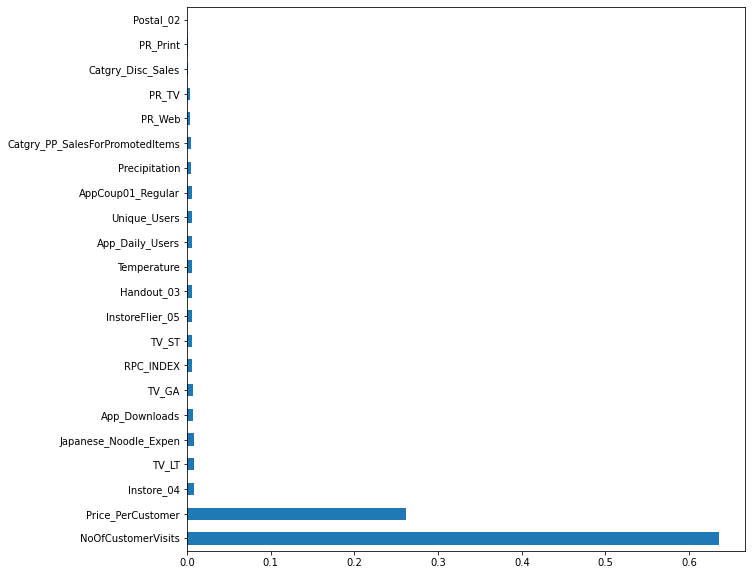

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [ ]:
X.columns

Index(['NoOfCustomerVisits', 'Price_PerCustomer', 'Temperature',
       'Precipitation', 'RPC_INDEX', 'Japanese_Noodle_Expen',
       'AppCoup01_Regular', 'App_Daily_Users', 'App_Downloads', 'Postal_02',
       'Handout_03', 'Instore_04', 'InstoreFlier_05', 'TV_ST', 'TV_LT',
       'TV_GA', 'PR_Web', 'PR_Print', 'PR_TV', 'Unique_Users',
       'Catgry_Disc_Sales', 'Catgry_PP_SalesForPromotedItems'],
      dtype='object')

In [ ]:
features = "+".join(['Price_PerCustomer', 'Temperature', 'Precipitation', 'RPC_INDEX',
       'Japanese_Noodle_Expen', 'AppCoup01_Regular', 'App_Daily_Users',
       'App_Downloads', 'Postal_02', 'Handout_03', 'Instore_04',
       'InstoreFlier_05', 'TV_ST', 'TV_LT', 'TV_GA', 'PR_Web', 'PR_Print',
       'PR_TV', 'Unique_Users', 'Catgry_Disc_Sales',
       'Catgry_PP_SalesForPromotedItems', 'NoOfCustomerVisits_Lag_2'])

In [ ]:
features

'Price_PerCustomer+Temperature+Precipitation+RPC_INDEX+Japanese_Noodle_Expen+AppCoup01_Regular+App_Daily_Users+App_Downloads+Postal_02+Handout_03+Instore_04+InstoreFlier_05+TV_ST+TV_LT+TV_GA+PR_Web+PR_Print+PR_TV+Unique_Users+Catgry_Disc_Sales+Catgry_PP_SalesForPromotedItems+NoOfCustomerVisits_Lag_2'

In [ ]:
import statsmodels.formula.api as sm
# model = sm.ols(formula="SalesMeter3MoneyTaxIncluded~Price_PerCustomer+Temperature+Precipitation+RPC_INDEX+Japanese_Noodle_Expen+AppCoup01_Regular+App_Daily_Users+App_Downloads+Postal_02+Handout_03+Instore_04+InstoreFlier_05+TV_ST+TV_LT+TV_GA+PR_Web+PR_Print+PR_TV+Unique_Users+Catgry_Disc_Sales+Catgry_PP_SalesForPromotedItems+NoOfCustomerVisits_Lag_2", data=df2_110011).fit()
model = sm.ols(formula="SalesMeter3MoneyTaxIncluded~NoOfCustomerVisits+Price_PerCustomer+Temperature+RPC_INDEX+Japanese_Noodle_Expen+TV_ST+TV_LT+TV_GA", data=df2_110011).fit()

### Print Model Summary
 1. Adjusted R Square
 2. Coefficients of the features
 3. Std Err for the features.
 4. P-value for the features.


In [ ]:
## your code here
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     SalesMeter3MoneyTaxIncluded   R-squared:                       0.996
Model:                                     OLS   Adj. R-squared:                  0.996
Method:                          Least Squares   F-statistic:                     6548.
Date:                         Tue, 02 Nov 2021   Prob (F-statistic):          1.47e-229
Time:                                 08:33:36   Log-Likelihood:                -2251.6
No. Observations:                          205   AIC:                             4519.
Df Residuals:                              197   BIC:                             4546.
Df Model:                                    7                                         
Covariance Type:                     nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

### Evaluate the Model on the testing Data
 
 1. MSE - Mean Squared Error
 2. RMSE - Root Mean Squared Error
 3. MAE - Mean Absolute Error
 4. MAPE - Mean Absolute Percentage Error

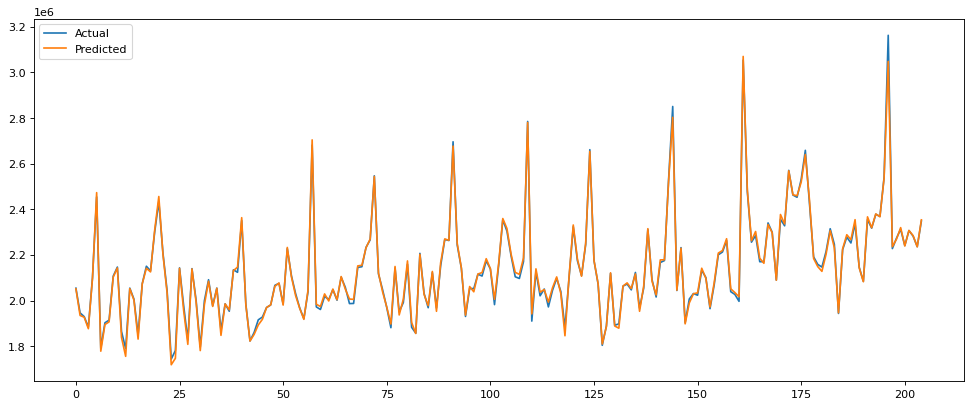

In [ ]:
## your code here
y_pred = model.predict()
labels = df2_110011['SalesMeter3MoneyTaxIncluded']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()
# Creating Line Graph
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()

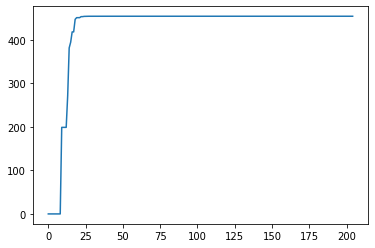

In [ ]:
import matplotlib.pyplot as plt
  
# define data values
x = np.array([i for i in range(205)])  # X-axis points
y = df2_110011.adstocked  # Y-axis points
  
plt.plot(x, y)  # Plot the chart
plt.show()

In [ ]:
df2_110011.drop('adstocked', axis=1).corr()

,NoOfCustomerVisits,SalesMeter3MoneyTaxIncluded,Price_PerCustomer,Temperature,Precipitation,RPC_INDEX,Japanese_Noodle_Expen,AppCoup01_Regular,App_Daily_Users,App_Downloads,Postal_02,Handout_03,Instore_04,InstoreFlier_05,TV_ST,TV_LT,TV_GA,PR_Web,PR_Print,PR_TV,Total_PR,Tweets,Page_Views,Unique_Users,Total_MealCount,Catgry_Disc_Sales,Catgry_PP_SalesForPromotedItems,Month_No,NoOfCustomerVisits_Lag_2
NoOfCustomerVisits,1.000000,0.791259,-0.293747,0.195658,-0.112848,0.124939,0.395319,0.014432,0.020632,0.050183,-0.089953,0.156094,0.395628,0.261367,0.242896,0.242896,0.152612,0.102545,0.074719,-0.031996,-0.029861,0.158974,0.433752,0.434233,0.060332,0.348937,0.312709,0.021652,0.233826
SalesMeter3MoneyTaxIncluded,0.791259,1.000000,0.348337,0.016303,-0.131728,0.186990,0.428023,-0.073158,0.187093,-0.043924,-0.075435,0.093550,0.247632,0.279708,0.271939,0.271939,0.199834,0.128682,0.080648,-0.023976,-0.021428,0.154146,0.380798,0.362327,0.308648,0.078883,0.355870,0.108305,0.143402
Price_PerCustomer,-0.293747,0.348337,1.000000,-0.277189,-0.036726,0.123893,0.075362,-0.134372,0.290478,-0.156484,0.022031,-0.105133,-0.240119,0.017993,0.076176,0.076176,0.099344,0.048614,0.009579,0.019207,0.019962,0.005428,-0.073498,-0.093182,0.404729,-0.400895,0.079130,0.120917,-0.128071
Temperature,0.195658,0.016303,-0.277189,1.000000,0.275873,0.115178,0.334222,0.076945,-0.012544,0.111077,-0.000418,0.063341,0.016349,-0.017103,0.107585,0.107585,0.054527,0.089444,0.014625,0.071553,0.072928,0.079238,0.010320,0.003815,-0.279964,0.052969,0.289479,0.298687,0.063703
Precipitation,-0.112848,-0.131728,-0.036726,0.275873,1.000000,0.053825,0.066646,-0.061617,0.149060,0.049019,0.028992,0.097038,-0.071685,-0.107981,-0.087845,-0.087845,-0.092600,-0.016432,-0.001876,-0.015711,-0.015957,0.053737,0.037985,0.053926,-0.183187,0.140275,0.193251,0.106269,-0.044624
RPC_INDEX,0.124939,0.186990,0.123893,0.115178,0.053825,1.000000,0.335190,-0.107214,0.237015,-0.159902,-0.010580,0.082322,0.085091,0.200952,0.070881,0.070881,0.068158,0.240930,0.057257,0.153709,0.157583,0.376689,0.335080,0.347787,-0.049780,0.246921,0.234846,-0.022567,-0.048153
Japanese_Noodle_Expen,0.395319,0.428023,0.075362,0.334222,0.066646,0.335190,1.000000,-0.002404,0.211564,-0.161231,-0.010412,0.070103,0.042976,0.091130,0.136196,0.136196,0.093545,0.249367,0.035875,0.075519,0.079240,0.214229,0.214154,0.233162,0.138862,0.224493,0.383225,0.355233,-0.001523
AppCoup01_Regular,0.014432,-0.073158,-0.134372,0.076945,-0.061617,-0.107214,-0.002404,1.000000,-0.054819,-0.001095,0.028673,-0.075584,-0.077444,-0.133775,0.046141,0.046141,0.028829,-0.048930,-0.083896,-0.031452,-0.033004,-0.058925,-0.092623,-0.111783,0.049729,-0.070187,-0.043474,0.082918,0.053699
App_Daily_Users,0.020632,0.187093,0.290478,-0.012544,0.149060,0.237015,0.211564,-0.054819,1.000000,-0.147688,0.021280,0.042771,0.094159,0.042635,0.177122,0.177122,0.167166,0.055654,-0.016848,0.104973,0.105583,0.037438,0.321750,0.358561,0.214172,0.121749,0.025445,0.240928,-0.108677
App_Downloads,0.050183,-0.043924,-0.156484,0.111077,0.049019,-0.159902,-0.161231,-0.001095,-0.147688,1.000000,-0.023979,-0.022794,-0.035976,-0.063162,0.150968,0.150968,0.134199,-0.090258,-0.041276,-0.078310,-0.079981,-0.050161,0.174282,0.167219,-0.063958,-0.038716,-0.093895,0.042429,0.026831


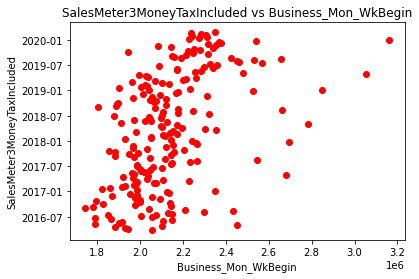

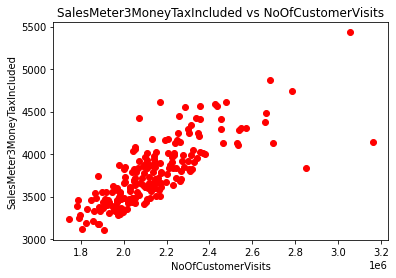

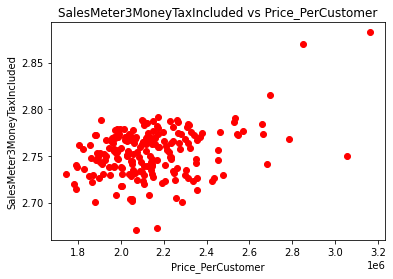

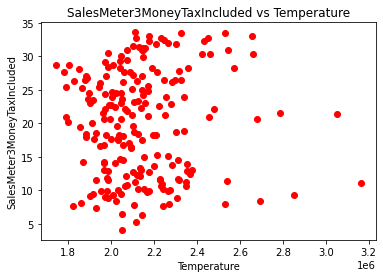

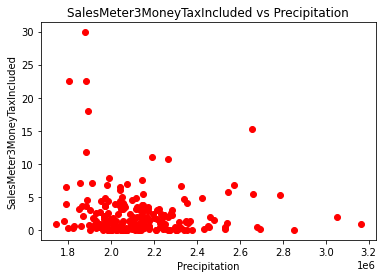

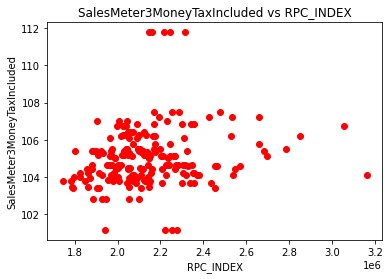

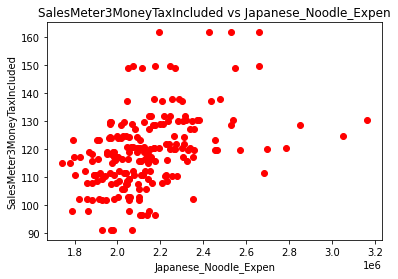

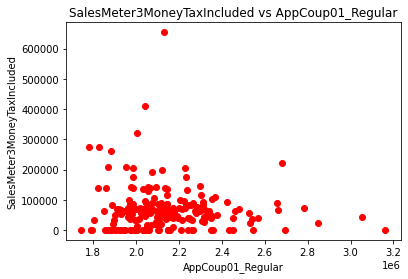

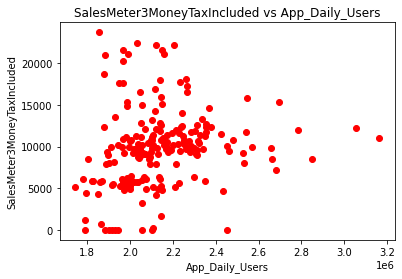

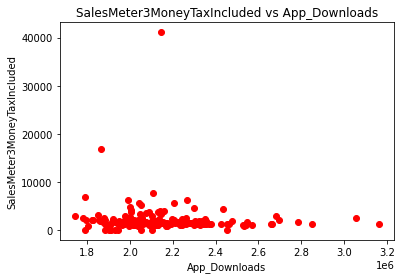

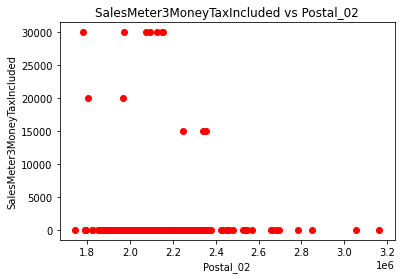

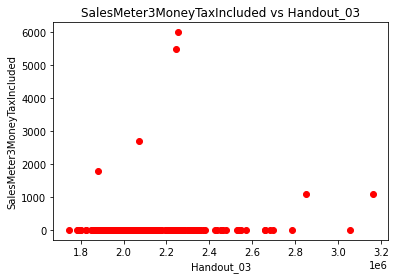

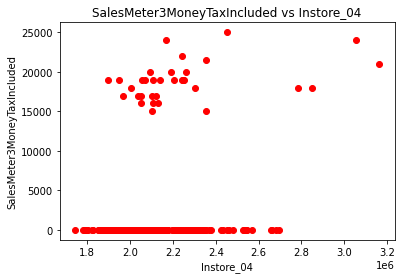

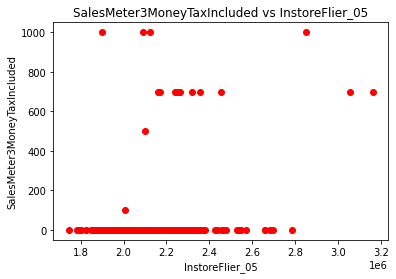

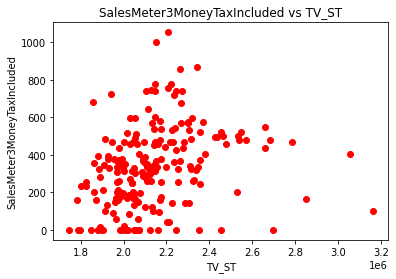

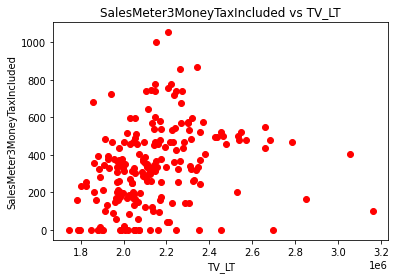

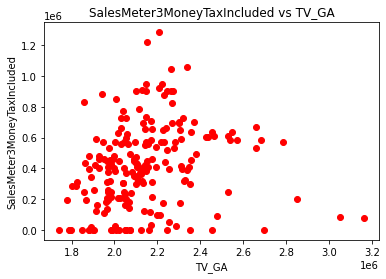

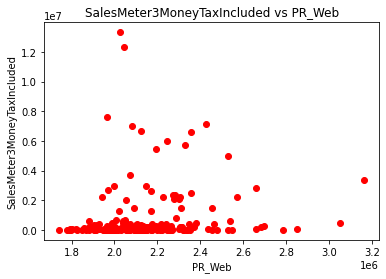

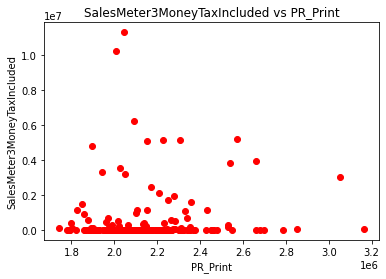

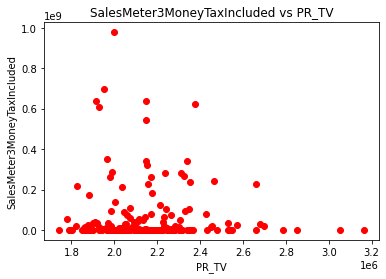

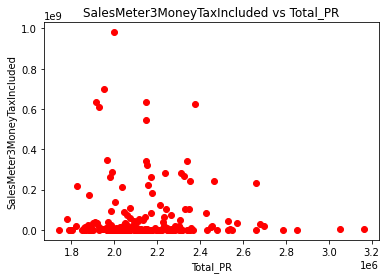

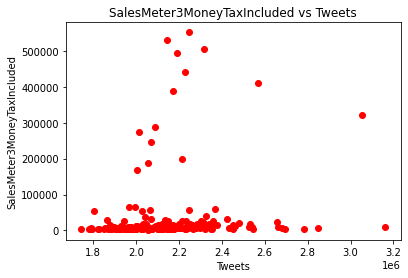

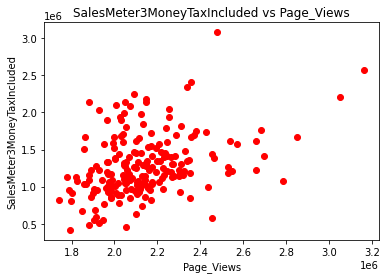

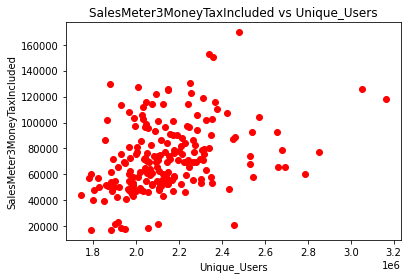

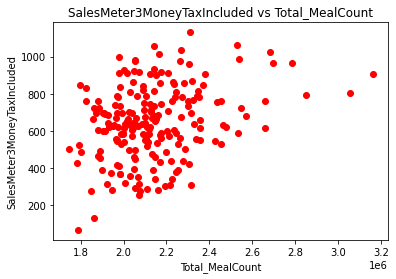

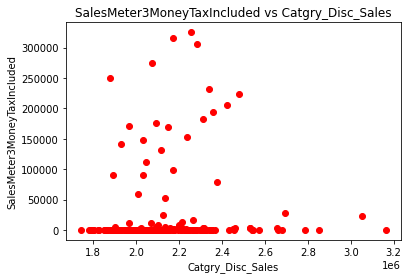

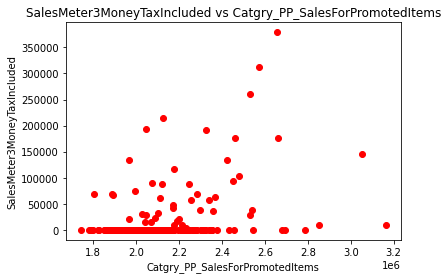

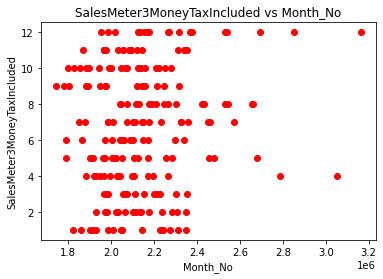

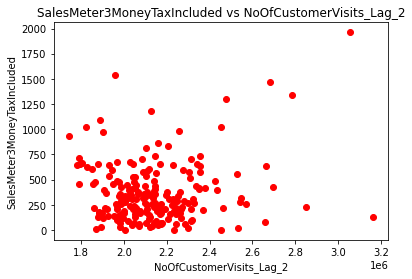

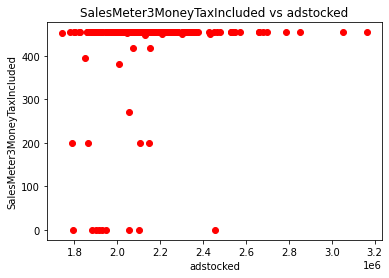

In [ ]:
labels = df2_110011['SalesMeter3MoneyTaxIncluded']
features = df2_110011.drop(['SalesMeter3MoneyTaxIncluded'], axis=1)
# Scatter graph b/w response and features
for x in features:
    plt.plot(labels, features[x], 'ro')  # arguments are passed to np.histogram
    plt.title("SalesMeter3MoneyTaxIncluded vs " + x)
    plt.xlabel(x)
    plt.ylabel("SalesMeter3MoneyTaxIncluded")
    plt.show()